In [1]:
#Importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telcome_customer_churn.csv', index_col = False)

In [3]:
#Top five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df2 = df.copy()

In [9]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Since the Total charges column data type is object instead of integer or float there is a tendency that I may have a missing data.
#In that case I will convert it to an integer
#Converting 'TotalCharges' column to a float
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

In [11]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Checking for records that have missing values
df2.loc[df2['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
print(df['TotalCharges'].dtypes)

object


In [14]:
df2['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
print(df2['TotalCharges'].unique())

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [17]:
#Checking the data type of the 'TotalCharges' column
print(df2['TotalCharges'].dtypes)

float64


In [18]:
#Replacing the missing values in ['TotalCharges'] column with backwardfill
df2['TotalCharges'] = df['TotalCharges'].bfill()

In [19]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

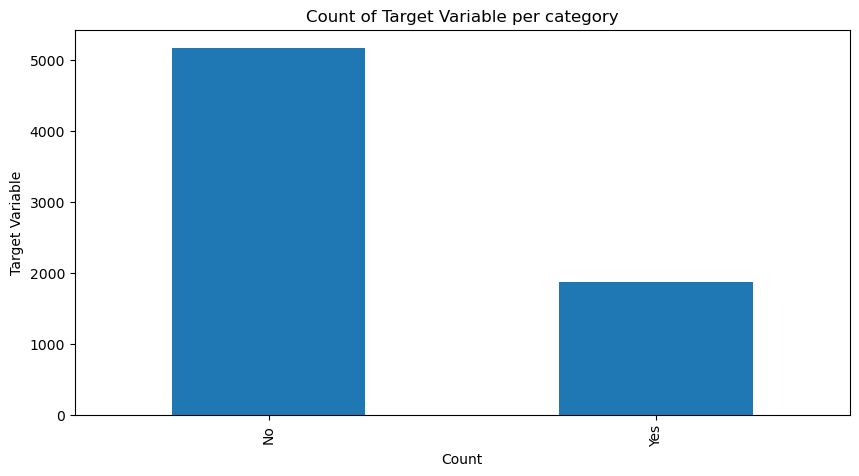

In [20]:
df2['Churn'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of Target Variable per category");
plt.show()

In [21]:
df2['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [22]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df['Churn'].value_counts()*100/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [24]:
print(df2['tenure'].max())

72


In [25]:
#Grouping the tenure in to bins 
bins = [0, 18, 36, 54, 72]
labels = ['NewCustomers', 'Short-TermCustomers', 'Mid-TermCustomers', 'Long-TermCustomers']

# Converting the 'Values' column into groups and create a new column

#converting the 'tenure' column values into discrete categories with a new column name 'TenureGroup'
df2['TenureGroup'] = pd.cut(df2['tenure'], bins=bins, labels=labels, right=True)

In [26]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureGroup'],
      dtype='object')

In [27]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers


In [28]:
#Ciunt of values in the TenureGroup
df2['TenureGroup'].value_counts()

TenureGroup
NewCustomers           2723
Long-TermCustomers     1819
Short-TermCustomers    1308
Mid-TermCustomers      1182
Name: count, dtype: int64

In [29]:
df2['TenureGroup'].unique()

['NewCustomers', 'Short-TermCustomers', 'Mid-TermCustomers', 'Long-TermCustomers', NaN]
Categories (4, object): ['NewCustomers' < 'Short-TermCustomers' < 'Mid-TermCustomers' < 'Long-TermCustomers']

In [30]:
# Replacing 'nan' strings with NaN values if needed
df2['TenureGroup'] = df2['TenureGroup'].replace('nan', np.nan)

In [31]:
#Calculating the mode of the TenureGroup column
mode_value = df2['TenureGroup'].mode()[0]

In [32]:

#Filling missing values by assigning the result back to the column
df2['TenureGroup'] = df2['TenureGroup'].fillna(mode_value)

In [33]:
df2['TenureGroup'].unique()

['NewCustomers', 'Short-TermCustomers', 'Mid-TermCustomers', 'Long-TermCustomers']
Categories (4, object): ['NewCustomers' < 'Short-TermCustomers' < 'Mid-TermCustomers' < 'Long-TermCustomers']

In [34]:
#Droping 'CustomerID' and 'tenure' columns 
df2.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)

In [35]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers


In [36]:
# Counting the total number of customers in each group
group_counts = df2['TenureGroup'].value_counts()

In [37]:
#Maping the counts back to the DataFrame
df2['TenureGroupCount'] = df2['TenureGroup'].map(group_counts)

In [38]:
df2['TenureGroup'].value_counts()

TenureGroup
NewCustomers           2734
Long-TermCustomers     1819
Short-TermCustomers    1308
Mid-TermCustomers      1182
Name: count, dtype: int64

In [39]:
df2['TenureGroup'].unique()

['NewCustomers', 'Short-TermCustomers', 'Mid-TermCustomers', 'Long-TermCustomers']
Categories (4, object): ['NewCustomers' < 'Short-TermCustomers' < 'Mid-TermCustomers' < 'Long-TermCustomers']

In [40]:
df2['TenureGroup'] = df2['TenureGroup'].astype(str)

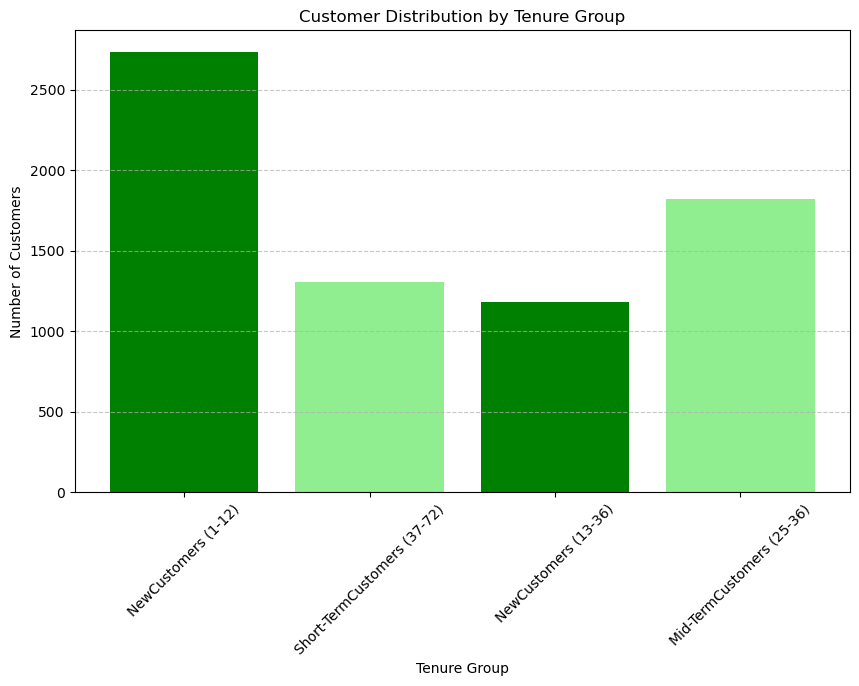

In [41]:
# Defining the custom labels for the x-axis
custom_labels = ['1-12', '37-72', '13-36', '25-36']

#Combining TenureGroup with custom labels
combined_labels = [f"{group} ({custom})" for group, custom in zip(df2['TenureGroup'], custom_labels)]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df2['TenureGroup'], df2['TenureGroupCount'], color=['skyblue', 'green', 'lightgreen', 'blue'])
plt.title('Customer Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')

# Setting custom x-axis labels
plt.xticks(ticks=range(len(combined_labels)), labels=combined_labels, rotation=45)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [42]:
df2['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

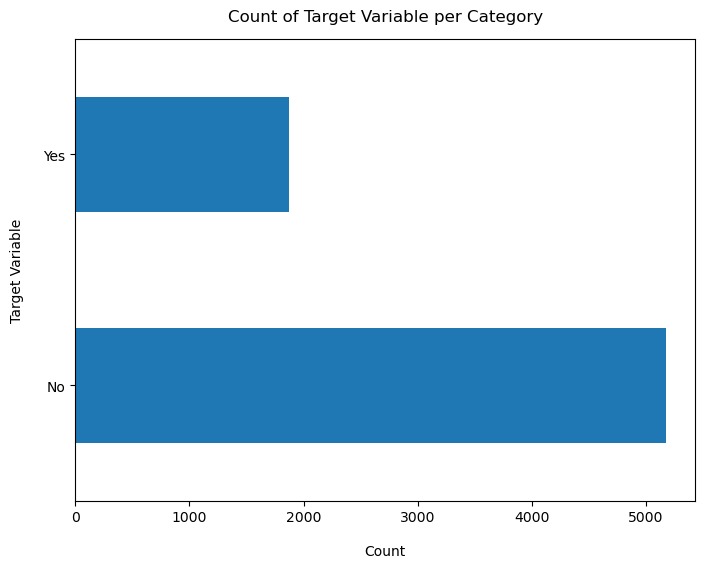

In [43]:
#Counting the values of the 'Churn' column and plot
df2['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))

#Customizing the axes and title
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per Category", y=1.02)

plt.show()


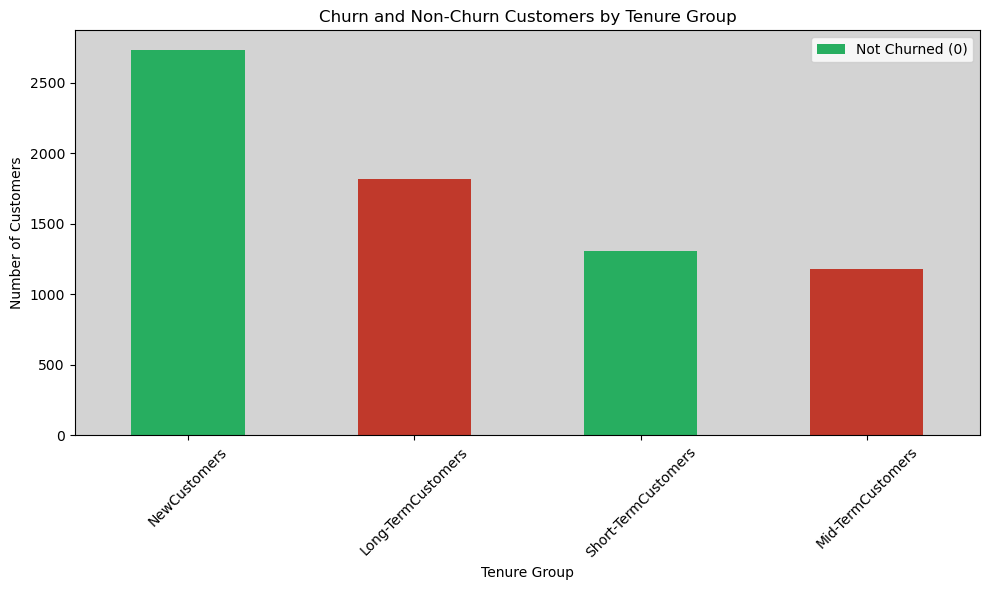

In [44]:
#Counting the number of churned and non-churned customers in each tenure group

group_counts.plot(kind='bar', color=['#27ae60', '#c0392b'], figsize=(10, 6))  # Dark red and green

# Customizing the plot 
plt.title('Churn and Non-Churn Customers by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(['Not Churned (0)', 'Churned (1)'])
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()

plt.show()


In [45]:
#Droping some columns for the data to be fit to machine learning 
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers,2734
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers,1308
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers,2734
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers,1182
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers,2734


In [46]:
df3 = df2.copy()

In [47]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers,2734
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers,1308
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers,2734
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers,1182
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers,2734


In [48]:
df4 = df3.copy()

In [49]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers,2734
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers,1308
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers,2734
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers,1182
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers,2734


In [50]:
#Droping some columns
df4.drop(columns=['MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

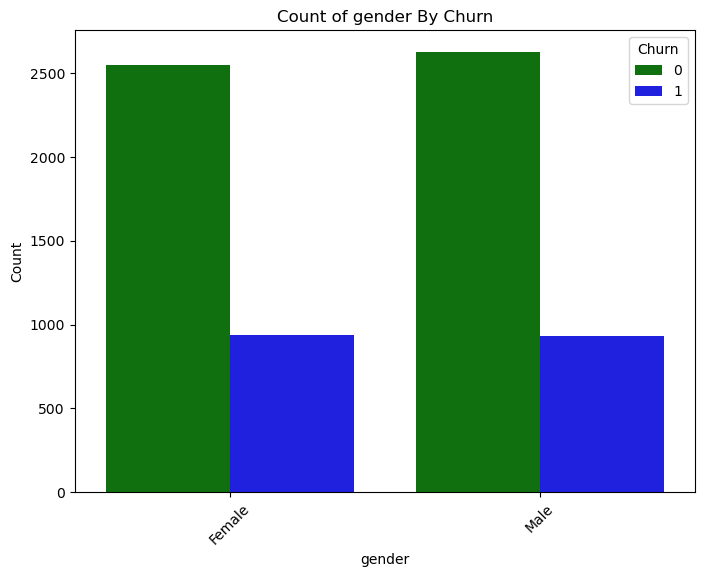

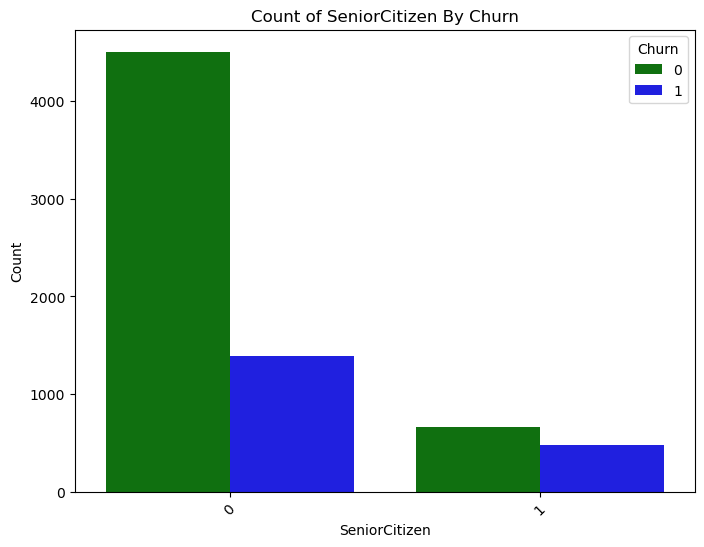

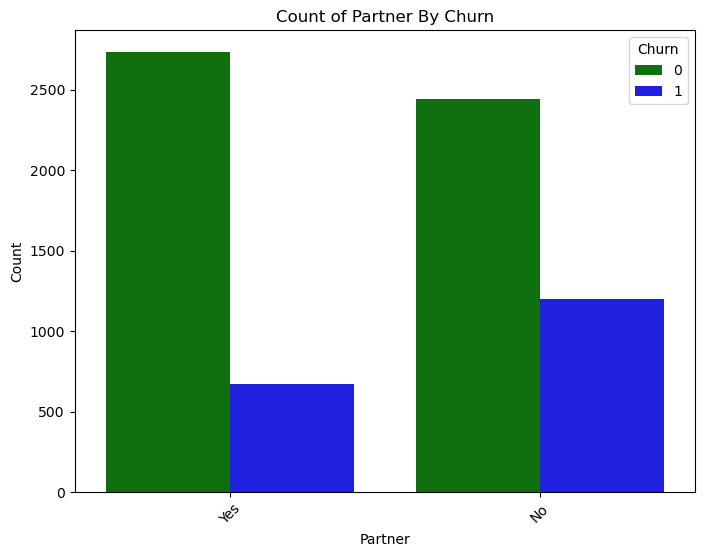

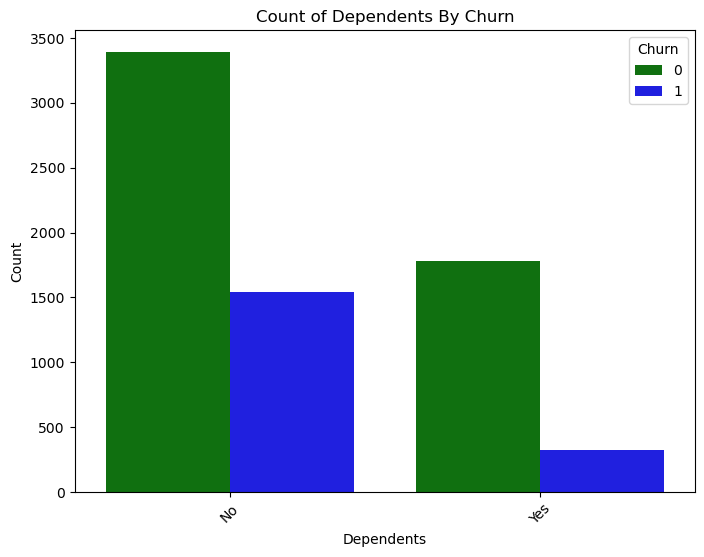

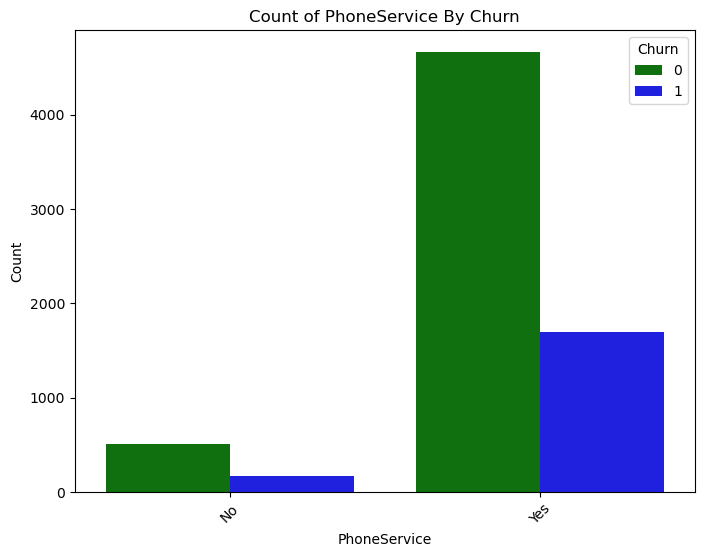

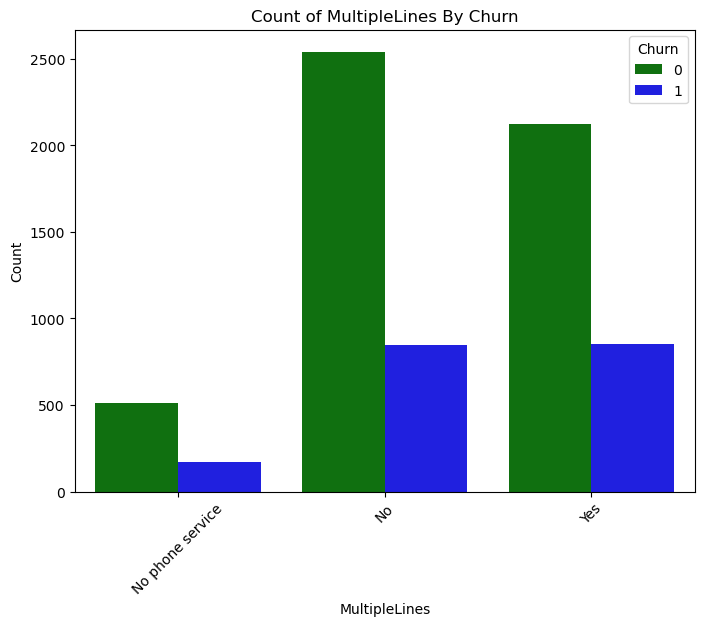

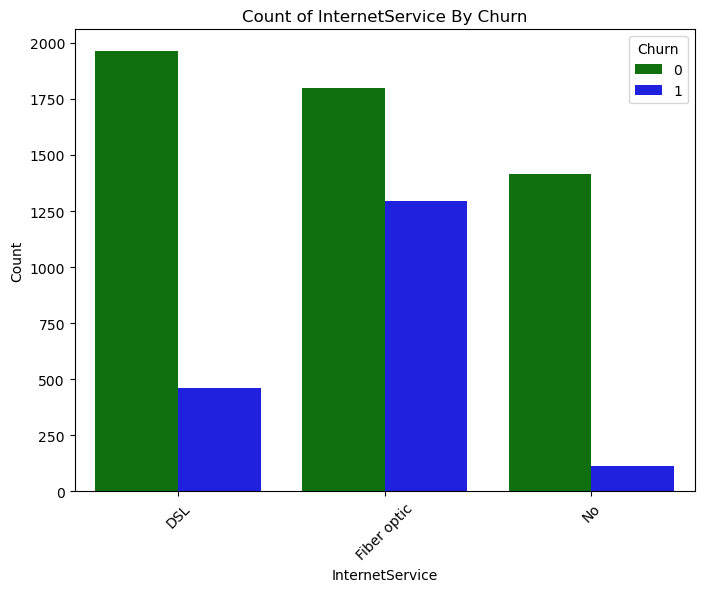

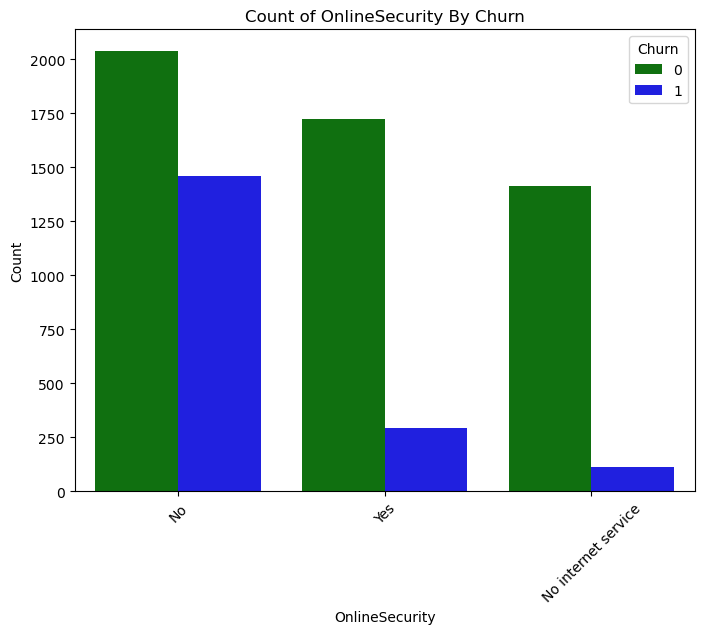

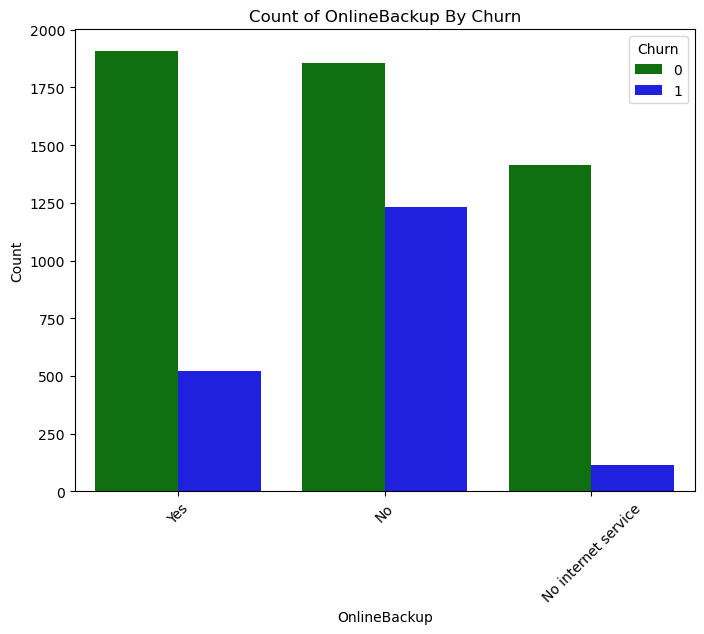

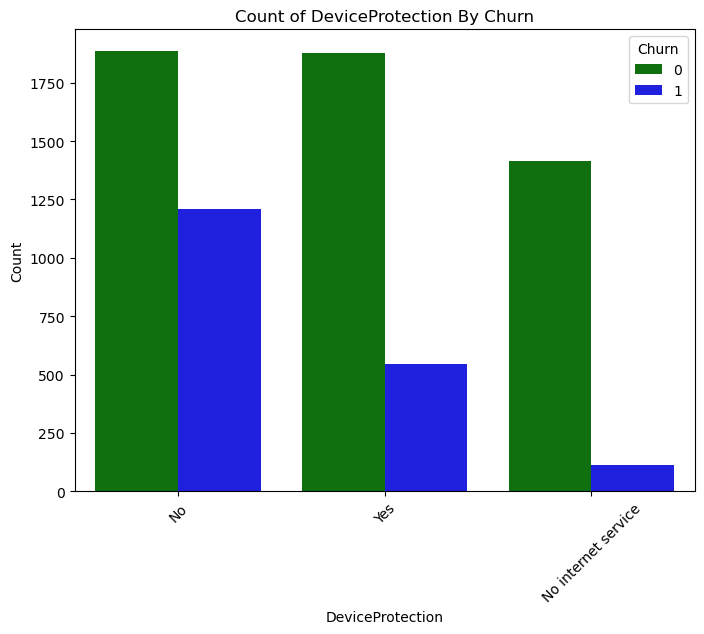

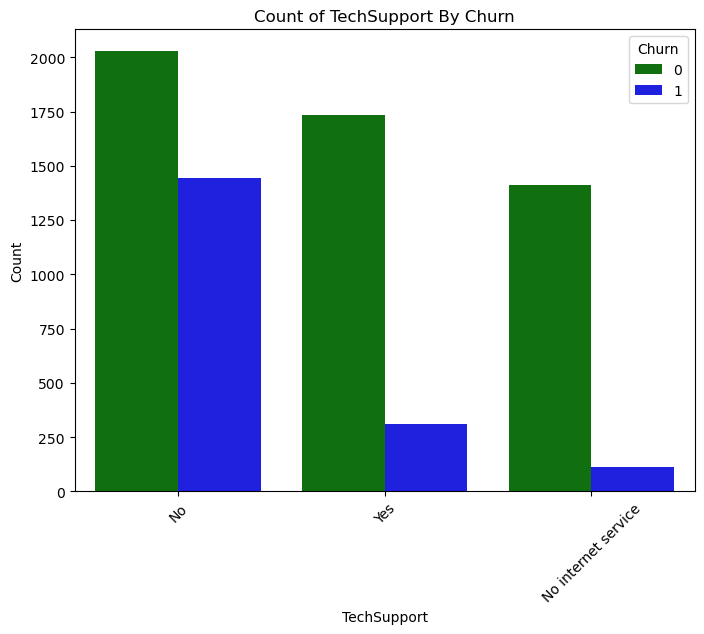

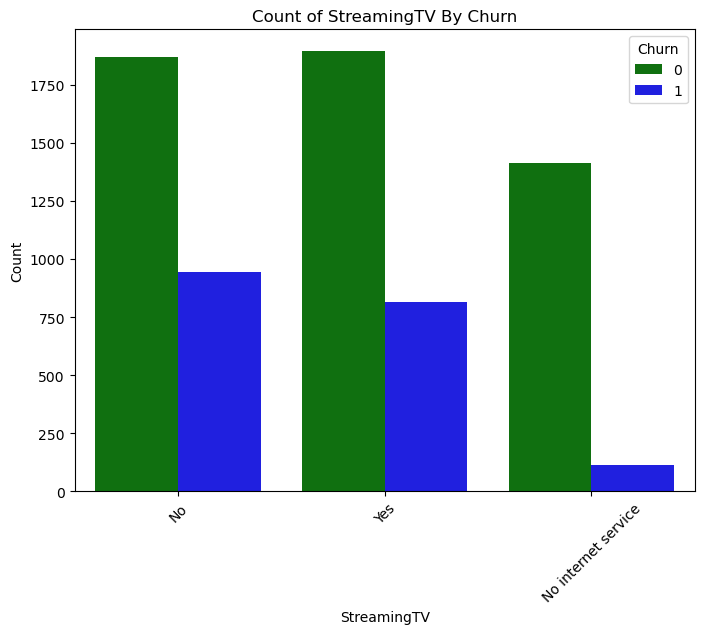

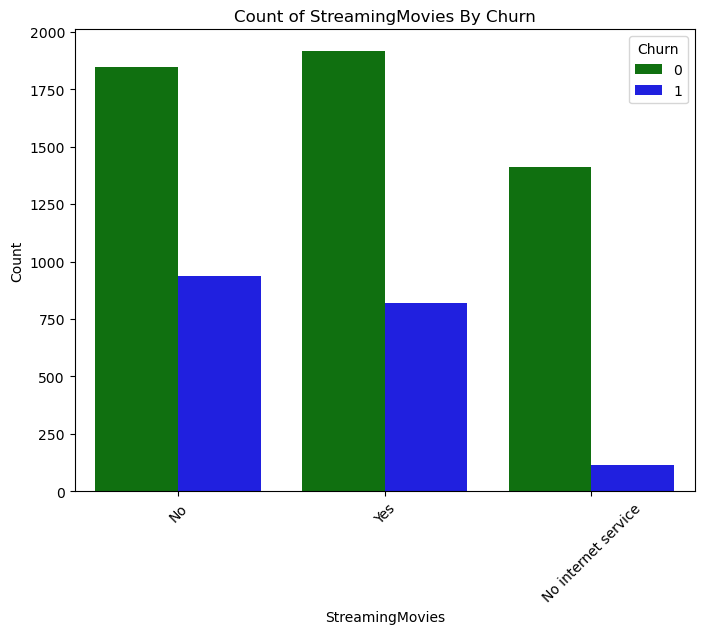

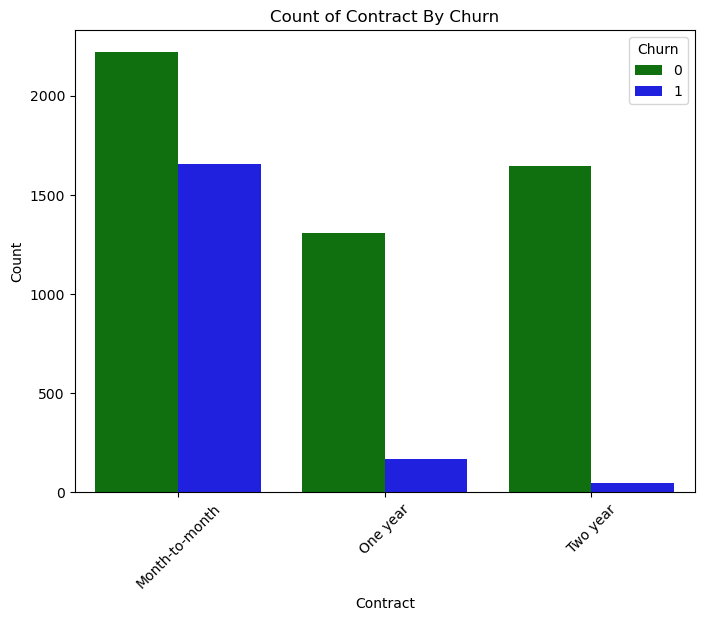

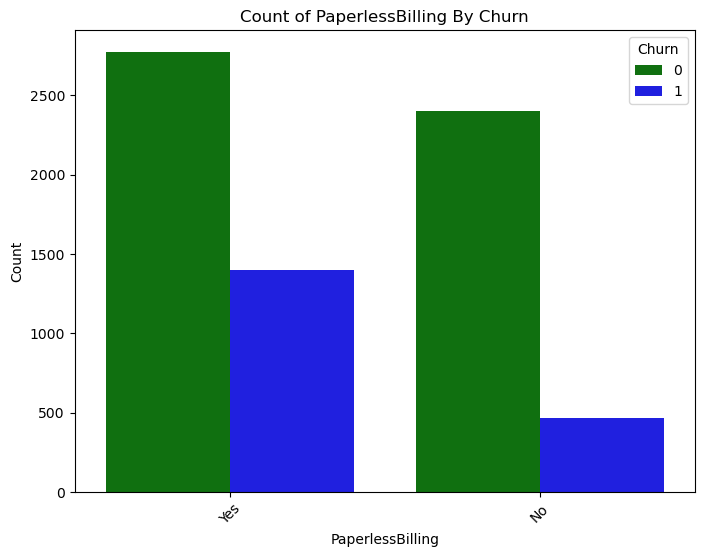

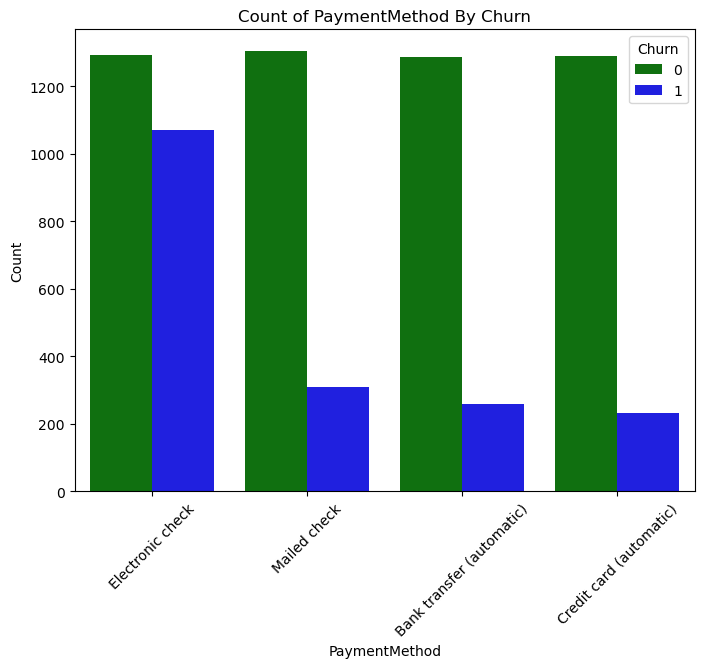

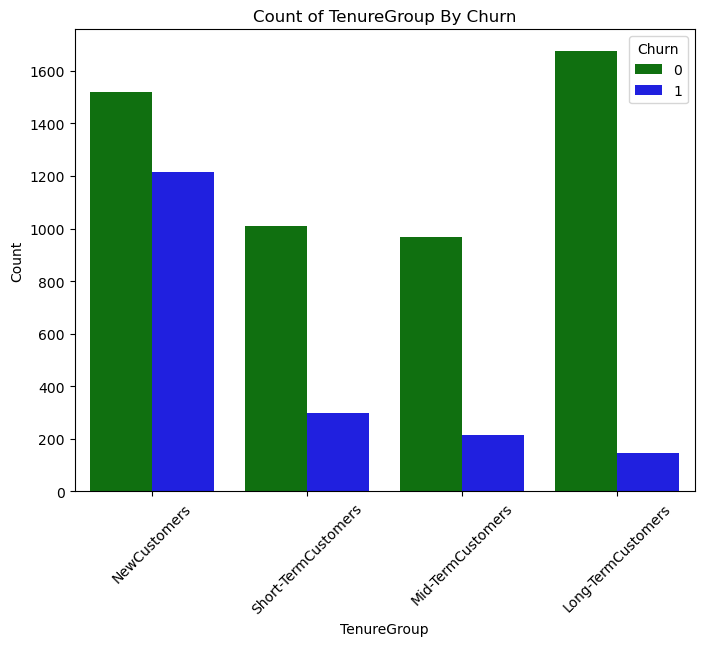

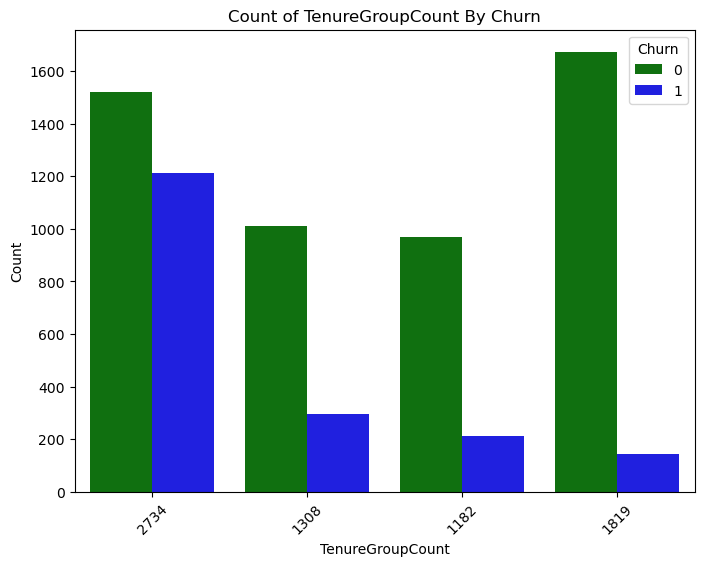

In [51]:
# Assuming df3 is defined and contains the 'Churn' column in Boolean
# Converting Churn to numeric values in df4
df4['Churn'] = df4['Churn'].map({'No': 0, 'Yes': 1})

#Defining the palette for hue values
palette = {0: 'green', 1: 'blue'}

#Looping through some columns in df3
for column in df4.columns:
    if column != 'Churn':  #Exclude Churn from being plotted as a feature
        plt.figure(figsize=(8, 6))
        
        #Checking if the column has valid data
        if df4[column].notnull().any():
            sns.countplot(data=df4, x=column, hue='Churn', palette=palette)
            
            plt.xticks(rotation=45)
            plt.title('Count of {} By Churn'.format(column))
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.legend(title='Churn', loc='upper right')
            plt.show()  # Show each plot
        else:
            print(f"No valid data to plot for {column}.")

In [52]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NewCustomers,2734
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Short-TermCustomers,1308
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NewCustomers,2734
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-TermCustomers,1182
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NewCustomers,2734


In [53]:
#Converting the values in the column to binary
df3['Churn'] = np.where(df3.Churn == 'Yes',1,0)
df3['gender'] = np.where(df3.gender == 'Yes',1,0)

In [54]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,0,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NewCustomers,2734
1,0,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,Short-TermCustomers,1308
2,0,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,NewCustomers,2734
3,0,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Mid-TermCustomers,1182
4,0,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,NewCustomers,2734


In [55]:
# Converting the boolean values to integers
df3['Churn'] = df3['Churn'].astype(int)

df3['gender'] = df3['gender'].astype(int)

In [56]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,0,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NewCustomers,2734
1,0,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,Short-TermCustomers,1308
2,0,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,NewCustomers,2734
3,0,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Mid-TermCustomers,1182
4,0,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,NewCustomers,2734


In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int32   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

In [58]:
#converting the TotalCharges column in df3 to a numeric data type 
df3.TotalCharges = pd.to_numeric(df3.TotalCharges, errors='coerce')
df3.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureGroup          0
TenureGroupCount     0
dtype: int64

In [59]:
#Using backward fill to fill empty values in the TotalCharges column
df3['TotalCharges'] = df3['TotalCharges'].bfill()

In [60]:
df3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureGroup         0
TenureGroupCount    0
dtype: int64

In [61]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TenureGroupCount
0,0,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NewCustomers,2734
1,0,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Short-TermCustomers,1308
2,0,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,NewCustomers,2734
3,0,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Mid-TermCustomers,1182
4,0,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,NewCustomers,2734


In [62]:
data_dummies = pd.get_dummies(df3)

In [63]:
data_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,29.85,29.85,0,False,True,True,False,True,...,True,False,False,False,True,False,True,False,False,False
1,0,0,56.95,1889.50,0,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,0,0,53.85,108.15,1,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
3,0,0,42.30,1840.75,0,True,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0,0,70.70,151.65,1,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False


In [64]:
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,29.85,29.85,0,False,True,True,False,True,...,True,False,False,False,True,False,True,False,False,False
1,0,0,56.95,1889.50,0,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,0,0,53.85,108.15,1,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
3,0,0,42.30,1840.75,0,True,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0,0,70.70,151.65,1,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False


In [65]:
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,29.85,29.85,0,False,True,True,False,True,...,True,False,False,False,True,False,True,False,False,False
1,0,0,56.95,1889.50,0,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,0,0,53.85,108.15,1,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
3,0,0,42.30,1840.75,0,True,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0,0,70.70,151.65,1,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False


In [66]:
df_dummies.columns

Index(['gender', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Paperle

In [67]:
#Droping some columns to avoid multiculinarity
#df_dummies.drop(columns = ['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
                           #'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                          #'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                          #'StreamingMovies_No internet service', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
                          #'TenureGroup_Short-TermCustomers', 'TenureGroupCount_2734'], axis = 1, inplace = True)

In [68]:
df_dummies.columns

Index(['gender', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Paperle

In [69]:
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,29.85,29.85,0,False,True,True,False,True,...,True,False,False,False,True,False,True,False,False,False
1,0,0,56.95,1889.50,0,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,0,0,53.85,108.15,1,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
3,0,0,42.30,1840.75,0,True,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0,0,70.70,151.65,1,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False


In [70]:
#Replacing 'Yes' with 1, 'No' with 0, True with 1, and False with 0
df_dummies = df_dummies.replace({'Yes': 1, 'No': 0, True: 1, False: 0})

# Explicitly converting types to int to avoid FutureWarning
df_dummies = df_dummies.astype(int)

In [71]:
df_dummies.tail(20)

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
7023,0,1,103,6479,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
7024,0,0,84,3626,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7025,0,0,95,1679,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
7026,0,0,44,403,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
7027,0,0,73,931,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
7028,0,0,64,4326,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7029,0,1,44,263,0,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
7030,0,0,20,39,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
7031,0,1,60,3316,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7032,0,1,75,75,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [72]:
df_dummies.shape

(7043, 52)

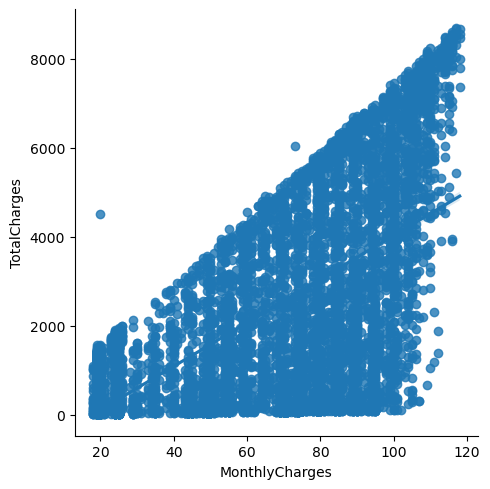

<Figure size 1000x500 with 0 Axes>

In [73]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges')
plt.figure(figsize=(10, 5))
# Show the plot
plt.show();

In [74]:
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,29,29,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,0,0,56,1889,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,53,108,1,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0,0,42,1840,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,70,151,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0


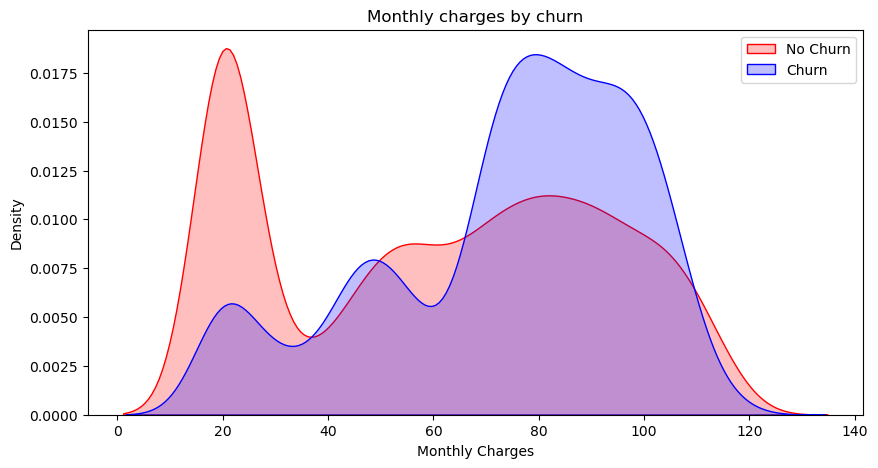

In [75]:
plt.figure(figsize=(10, 5)) 
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

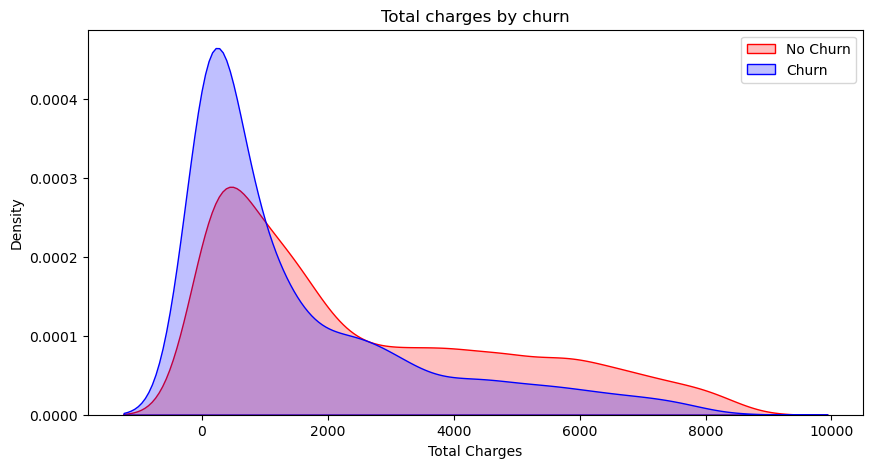

In [76]:
plt.figure(figsize=(10, 5))  # Adjust width and height as needed

Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

In [77]:

print(df_dummies['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


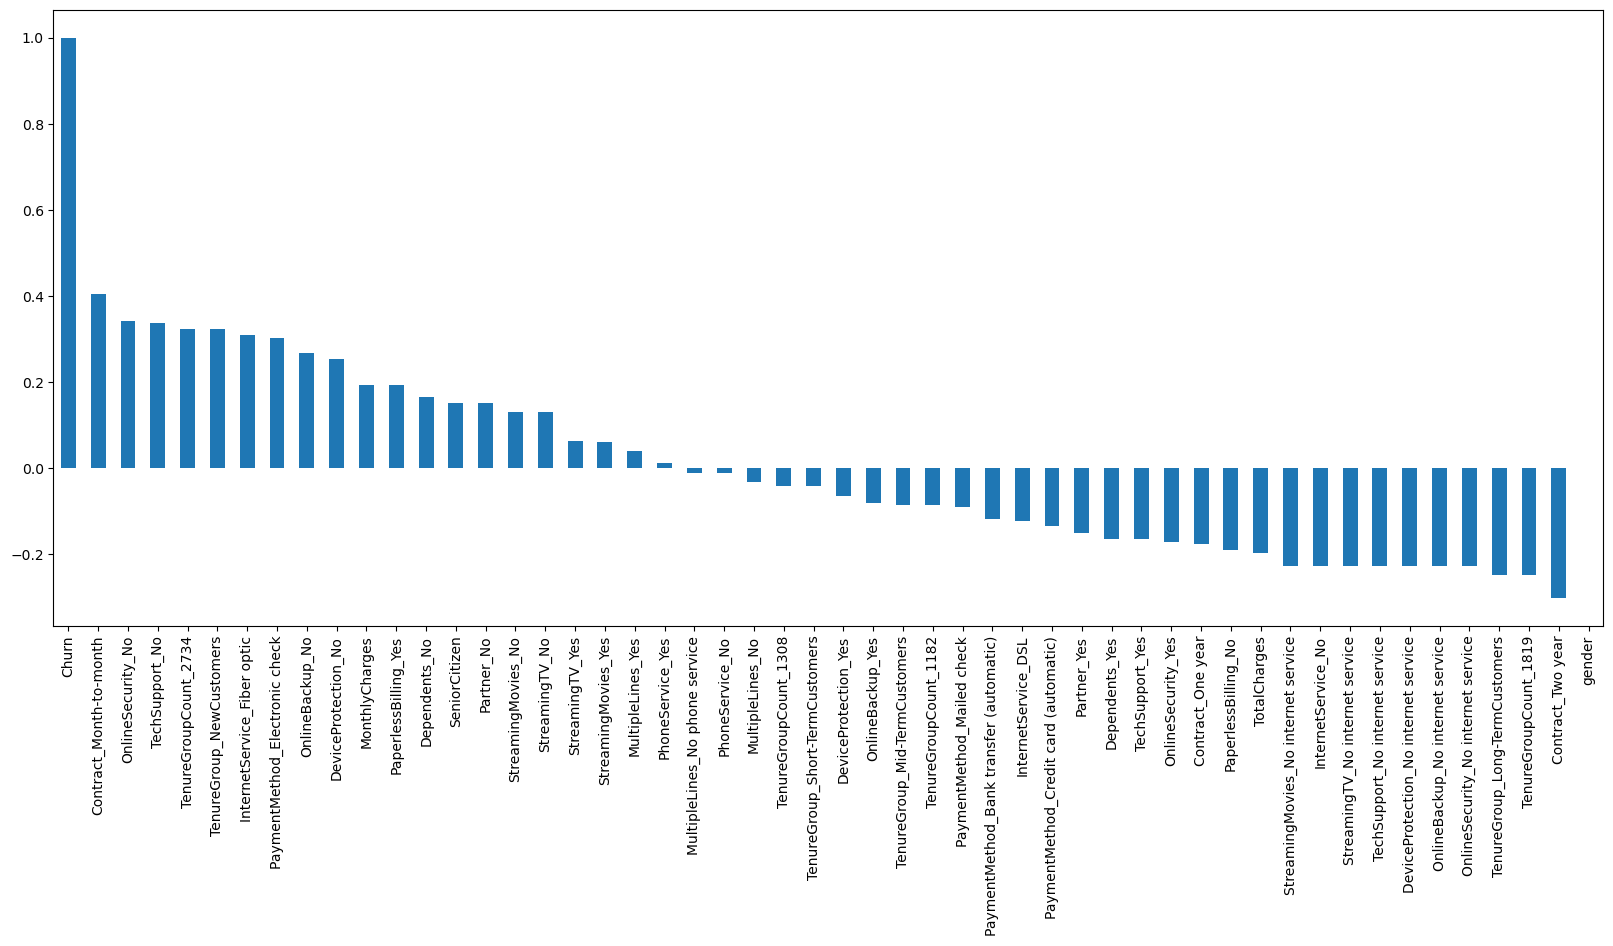

In [78]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');
plt.show()

Model Building 

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [81]:
df_dummies.shape

(7043, 52)

In [82]:
df_dummies.to_csv('clean_telecom.csv')

In [83]:
telecom_df = pd.read_csv('clean_telecom.csv')

In [84]:
telecom_df.head()

,Unnamed: 0,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroup_Short-TermCustomers,TenureGroupCount_2734,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
0,0,0,0,29,29,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
1,1,0,0,56,1889,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,2,0,0,53,108,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,3,0,0,42,1840,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,0,0,70,151,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [85]:
telecom_df = telecom_df.drop('Unnamed: 0', axis = 1)

In [86]:
#Converting all boolean columns to integers
telecom_df[telecom_df.select_dtypes(include='bool').columns] = telecom_df.select_dtypes(include='bool').astype(int)


In [87]:
#telecom_df.head()

In [88]:
#Droping some columns to avoid multiculinarity
telecom_df.drop(columns = ['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
                           'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                          'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                          'StreamingMovies_No internet service', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
                          'TenureGroup_Short-TermCustomers', 'TenureGroupCount_2734'], axis = 1, inplace = True)

In [89]:
print(telecom_df.columns)

Index(['gender', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'TenureGroup_Long-TermCustomers', 'TenureGroup_Mid-TermCustomers',
       'TenureGroup_NewCustomers', 'TenureGroupCount_1308',
       'TenureGroupCount_1182', 'TenureGroupCount_1819'],
      dtype='object')


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [91]:

# Rename the 'Male' column to 'Gender'
telecom_df.rename(columns={'gender_Female': 'Gender', 'Partner_No': 'Partner',  'Dependents_No': 'Dependents', 'PhoneService_No': 'PhoneService',
                  }, inplace=True)

In [92]:
telecom_df.tail()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_Yes,...,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819
7038,0,0,84,1990,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7039,0,0,103,7362,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
7040,0,0,29,346,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7041,0,1,74,306,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
7042,0,0,105,6844,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [93]:
#print(telecom.columns)

In [94]:
#telecom.columns

Spliting the data

In [96]:
features = telecom_df.drop(['Churn', 'MonthlyCharges', 'TotalCharges'], axis = 1)
y = telecom_df['Churn']
z = telecom_df[['MonthlyCharges', 'TotalCharges']]

In [97]:

# Selecting columns to standardize
z = telecom_df[['MonthlyCharges', 'TotalCharges']]

In [98]:

# Initialize the StandardScaler
scaler = StandardScaler()


In [99]:

# Fit and transform the data
z_standardized = scaler.fit_transform(z)

In [100]:


# Convert the standardized array back to a DataFrame
z_standardized_df = pd.DataFrame(z_standardized, columns=['MonthlyCharges', 'TotalCharges'])


In [101]:

# Check the standardized data
print(z_standardized_df)

      MonthlyCharges  TotalCharges
0          -1.172988     -0.993724
1          -0.275697     -0.173119
2          -0.375396     -0.958871
3          -0.740959     -0.194737
4           0.189564     -0.939900
...              ...           ...
7038        0.654826     -0.128559
7039        1.286253      2.241491
7040       -1.172988     -0.853869
7041        0.322496     -0.871516
7042        1.352719      2.012956

[7043 rows x 2 columns]


In [102]:
# Join the standardized DataFrame back to the original DataFrame
result_df = pd.concat([features, z_standardized_df], axis=1)


In [103]:
result_df.to_csv('telecom_standardized.csv')

In [104]:
# Join the result_df DataFrame with y
standardized_telecom = pd.concat([result_df, y], axis=1)

In [105]:
standardized_telecom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,...,PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,-1.172988,-0.993724,0
1,0,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,-0.275697,-0.173119,0
2,0,0,1,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,-0.375396,-0.958871,1
3,0,0,1,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,-0.740959,-0.194737,0
4,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0.189564,-0.939900,1


In [106]:
standardized_telecom.to_csv('standardized_telecom_churn.csv')

In [107]:
x = result_df

In [108]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,TenureGroup_Long-TermCustomers,TenureGroup_Mid-TermCustomers,TenureGroup_NewCustomers,TenureGroupCount_1308,TenureGroupCount_1182,TenureGroupCount_1819,MonthlyCharges,TotalCharges
0,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,-1.172988,-0.993724
1,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,-0.275697,-0.173119
2,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.375396,-0.958871
3,0,0,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,-0.740959,-0.194737
4,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0.189564,-0.939900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0.654826,-0.128559
7039,0,0,0,0,0,0,1,0,1,1,...,1,0,1,0,0,0,0,1,1.286253,2.241491
7040,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,-1.172988,-0.853869
7041,0,1,0,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0.322496,-0.871516


In [109]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Train Test Split

In [111]:
telecom_df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify= y, random_state= 2)

In [113]:
telecom_df.shape, x_train.shape, x_test.shape

((7043, 36), (5634, 35), (1409, 35))

In [114]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

In [115]:
#models use to test the data 

models = [LogisticRegression(class_weight='balanced', max_iter=10000),
          KNeighborsClassifier(), RandomForestClassifier(random_state = 0), DecisionTreeClassifier(), svm.SVC( kernel = 'rbf')]

In [116]:
#creating a function to compare the models base on the train test split function

def compare_models_train_test_split():

    #creating a for loop to loop through all the classifier
    for model in models:

        'training the model'
        model.fit(x_train, y_train)  #fitting the models into training data

        #evaluating the model
        train_data_prediction = model.predict(x_train)  #predicting the labels for the test data

        #comparing the True label and the predicted label
        accuracy = accuracy_score(y_train, train_data_prediction)

        #Printing the ACcuracy Score of the model
        print('Accuracy Score of the', model, ' = ', round(accuracy * 100, 2), '%')
        print('---------------------------------------------')

In [117]:
compare_models_train_test_split()

Accuracy Score of the LogisticRegression(class_weight='balanced', max_iter=10000)  =  74.44 %
---------------------------------------------
Accuracy Score of the KNeighborsClassifier()  =  83.69 %
---------------------------------------------
Accuracy Score of the RandomForestClassifier(random_state=0)  =  98.92 %
---------------------------------------------
Accuracy Score of the DecisionTreeClassifier()  =  98.92 %
---------------------------------------------
Accuracy Score of the SVC()  =  81.58 %
---------------------------------------------


In [118]:
#creating a function to compare the models base on the train test split function

def compare_models_train_test_split():

    #creating a for loop to loop through all the classifier
    for model in models:

        'training the model'
        model.fit(x_train, y_train)  #fitting the models into training data

        #evaluating the model
        test_data_prediction = model.predict(x_test)  #predicting the labels for the test data

        #comparing the True label and the predicted label
        accuracy = accuracy_score(y_test, test_data_prediction)

        #Printing the ACcuracy Score of the model
        print('Accuracy Score of the', model, ' = ', round(accuracy * 100, 2), '%')
        print('---------------------------------------------')

In [119]:
 compare_models_train_test_split()

Accuracy Score of the LogisticRegression(class_weight='balanced', max_iter=10000)  =  74.59 %
---------------------------------------------
Accuracy Score of the KNeighborsClassifier()  =  77.08 %
---------------------------------------------
Accuracy Score of the RandomForestClassifier(random_state=0)  =  78.35 %
---------------------------------------------
Accuracy Score of the DecisionTreeClassifier()  =  73.67 %
---------------------------------------------
Accuracy Score of the SVC()  =  79.7 %
---------------------------------------------


Cross Validation

In [121]:
#models use to train the data 

models = [LogisticRegression(class_weight='balanced', max_iter=10000),
          KNeighborsClassifier(), RandomForestClassifier(random_state = 0), DecisionTreeClassifier(), svm.SVC( kernel = 'rbf')]

Training Data Prediction

In [123]:
def compare_models_of_cross_validation():
    for model in models:
        # Perform cross-validation on the training data
        cv_score = cross_val_score(model, x_train, y_train.values.ravel(), cv=5) #To get ensures that I get a 1D array I used ravel() 
        
        # Calculate mean accuracy
        mean_accuracy = np.mean(cv_score) * 100  # Using np.mean for clarity
        mean_accuracy = round(mean_accuracy, 2)

        print('\nCross Validation Accuracies for the model:', model)
        print('Accuracies:', cv_score)
        print('Mean Accuracy Score:', mean_accuracy, '%')
        print('------------------------------------------------------------')

In [124]:
compare_models_of_cross_validation()


Cross Validation Accuracies for the model: LogisticRegression(class_weight='balanced', max_iter=10000)
Accuracies: [0.72937001 0.74622893 0.74889086 0.74622893 0.74866785]
Mean Accuracy Score: 74.39 %
------------------------------------------------------------

Cross Validation Accuracies for the model: KNeighborsClassifier()
Accuracies: [0.77462289 0.77284827 0.76131322 0.77373558 0.77886323]
Mean Accuracy Score: 77.23 %
------------------------------------------------------------

Cross Validation Accuracies for the model: RandomForestClassifier(random_state=0)
Accuracies: [0.78083407 0.77994676 0.77373558 0.78527063 0.79662522]
Mean Accuracy Score: 78.33 %
------------------------------------------------------------

Cross Validation Accuracies for the model: DecisionTreeClassifier()
Accuracies: [0.72670807 0.72759539 0.72670807 0.73114463 0.73712256]
Mean Accuracy Score: 72.99 %
------------------------------------------------------------

Cross Validation Accuracies for the mode

Conducting Upsampling With Training Data to Avoid Data Leakage

In [126]:
#Implementing Oversampling to handle the imbalance data
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 2)
x_resampled, y_resampled = smk.fit_resample(x_train, y_train)

In [127]:
#Printing the resampled dataset
x_resampled.shape, y_resampled.shape

((7978, 35), (7978,))

In [128]:
from collections import Counter

#Priting x_train and Resample data 

print('x_train data shape{}'.format(Counter(y)))
print('resample data shape{}'.format(Counter(y_resampled)))


x_train data shapeCounter({0: 5174, 1: 1869})
resample data shapeCounter({0: 3989, 1: 3989})


In [129]:
x_resampled.shape, y_resampled.shape

((7978, 35), (7978,))

In [130]:
#models use to test the data 

models = [LogisticRegression(class_weight='balanced', max_iter=10000), 
          RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, n_estimators=100, random_state=0),
          DecisionTreeClassifier(),
          svm.SVC( kernel = 'linear')
]

In [131]:
'Creating a function to compare the models base on the train test split function'
'Training Data Accuracy'
def compare_resampled_train_data():

    #creating a for loop to loop through all the classifier
    for model in models:

        'training the model'
        model.fit(x_resampled, y_resampled)  #fitting the models into training data

        #Evaluating the model
        resampled_train_data_prediction = model.predict(x_resampled)  #predicting the labels for the test data

        #comparing the True label and the predicted label
        accuracy = accuracy_score(y_resampled, resampled_train_data_prediction)

        #Printing the ACcuracy Score of the model
        print('Training Accuracy Score of the', model, ' = ', round(accuracy * 100, 2), '%')
        print('---------------------------------------------')

In [132]:
compare_resampled_train_data()

Training Accuracy Score of the LogisticRegression(class_weight='balanced', max_iter=10000)  =  82.77 %
---------------------------------------------
Training Accuracy Score of the RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)  =  88.32 %
---------------------------------------------
Training Accuracy Score of the DecisionTreeClassifier()  =  98.97 %
---------------------------------------------
Training Accuracy Score of the SVC(kernel='linear')  =  82.7 %
---------------------------------------------


Taking the best model from the list of model to retrain 

In [134]:
# Creating a model with RandomForestClassifier
random_model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, n_estimators=100, random_state=0)

In [135]:
random_model.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

In [136]:
#Accuracy Score on x_resampled data 
resampled_train_prediction = random_model.predict(x_resampled)
resampled_training_data_accuracy = accuracy_score(y_resampled, resampled_train_prediction)
print('Resamplee Training Data Accuracy is :', round(resampled_training_data_accuracy * 100, 2), '%')


Resamplee Training Data Accuracy is : 88.32 %


In [137]:
#Accuracy Score on Test data 
x_test_prediction = random_model.predict(x_test)
x_test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Test Data Accuracy is :', round(x_test_data_accuracy * 100, 2), '%')

Test Data Accuracy is : 78.78 %


In [138]:
# Creating a model with Support Vector Classifier
svc_model = svm.SVC( kernel = 'linear')

In [139]:
svc_model.fit(x_resampled, y_resampled)

SVC(kernel='linear')

In [140]:
#Accuracy Score on x_resampled data 
resampled_train_prediction = svc_model.predict(x_resampled)
resampled_training_data_accuracy = accuracy_score(y_resampled, resampled_train_prediction)
print('Resamplee Training Data Accuracy is :', round(resampled_training_data_accuracy * 100, 2), '%')


Resamplee Training Data Accuracy is : 82.7 %


In [141]:
#Accuracy Score on Test data 
x_test_prediction = svc_model.predict(x_test)
x_test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Test Data Accuracy is :', round(x_test_data_accuracy * 100, 2), '%')

Test Data Accuracy is : 78.57 %


In [142]:
# Creating a model with DecisionTreeClassifier

dec_model = DecisionTreeClassifier()

In [143]:
dec_model.fit(x_resampled, y_resampled)

DecisionTreeClassifier()

In [144]:
#Accuracy Score on x_resampled data 
resampled_train_prediction = dec_model.predict(x_resampled) 
resampled_training_data_accuracy = accuracy_score(y_resampled, resampled_train_prediction)
print('Resamplee Training Data Accuracy is :', round(resampled_training_data_accuracy * 100, 2), '%')


Resamplee Training Data Accuracy is : 98.97 %


In [145]:
#Accuracy Score on Test data 
x_test_prediction = dec_model.predict(x_test)
x_test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Test Data Accuracy is :', round(x_test_data_accuracy * 100, 2), '%')

Test Data Accuracy is : 72.18 %


Building a Predictive System

The model I adopted for building the predictive System is Support Vector Classifier that was tested with other model after resampling my data.

Reasons;

Is the most suitable choice due to its balanced performance, lower risk of overfitting, and reasonable test accuracy.

It provides a more reliable foundation for making strategic business decisions aimed at retaining customers.

In [148]:
# Sample feature names (making sure these match the training data)
feature_names = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines_No", "MultipleLines_Yes", "InternetService_DSL",
    "InternetService_Fiber optic", "OnlineSecurity_No", "OnlineSecurity_Yes",
    "OnlineBackup_No", "OnlineBackup_Yes", "DeviceProtection_No",
    "DeviceProtection_Yes", "TechSupport_No", "TechSupport_Yes",
    "StreamingTV_No", "StreamingTV_Yes", "StreamingMovies_No",
    "StreamingMovies_Yes", "Contract_Month-to-month", "Contract_One year",
    "PaperlessBilling_No", "PaymentMethod_Bank transfer (automatic)",
    "PaymentMethod_Credit card (automatic)", "PaymentMethod_Mailed check",
    "TenureGroup_Long-TermCustomers", "TenureGroup_Mid-TermCustomers",
    "TenureGroup_NewCustomers", "TenureGroupCount_1308",
    "TenureGroupCount_1182", "TenureGroupCount_1819", "MonthlyCharges",
    "TotalCharges"
]


In [149]:

# Inputting data for prediction
input_data = (0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0.15633137648002218,-0.8671041911866233)

# Converting the input data to a NumPy array
input_data_to_numpy = np.asarray(input_data)

# Reshaping the data to a 2D array since it's for one instance
reshaped_data = input_data_to_numpy.reshape(1, -1)

# Creating a DataFrame with the reshaped data
input_df = pd.DataFrame(reshaped_data, columns=feature_names)

# Making the prediction
prediction = svc_model.predict(input_df)

# Making the prediction with a conditional statement
if prediction[0]:
    print('This Customer has Churned')
else:
    print('This Customer is still Active')

This Customer has Churned


In [150]:

# Inputting data for prediction
input_data = (0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1.4524176249302052,2.4920840541761717)

# Converting the input data to a NumPy array
input_data_to_numpy = np.asarray(input_data)

# Reshaping the data to a 2D array since it's for one instance
reshaped_data = input_data_to_numpy.reshape(1, -1)

# Creating a DataFrame with the reshaped data
input_df = pd.DataFrame(reshaped_data, columns=feature_names)

# Making the prediction
prediction = svc_model.predict(input_df)

# Making the prediction with a conditional statement
if prediction[0]:
    print('This Customer has Churned')
else:
    print('This Customer is still Active')

This Customer is still Active
